In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [3]:
training_data = []
IMG_SIZE = 100
DATADIR = "Fruit/fruits-360_dataset/fruits-360/Training"

CATEGORIES = [i for i in os.listdir(DATADIR) if not i.startswith('.')]
print(CATEGORIES)

['Tomato 4', 'Apple Red Delicious', 'Tomato 3', 'Huckleberry', 'Blueberry', 'Pear Red', 'Banana Lady Finger', 'Melon Piel de Sapo', 'Pear', 'Cherry 1', 'Strawberry', 'Nut Forest', 'Avocado', 'Tomato 2', 'Pomegranate', 'Dates', 'Carambula', 'Potato Red Washed', 'Granadilla', 'Kohlrabi', 'Tamarillo', 'Pepper Red', 'Fig', 'Ginger Root', 'Kiwi', 'Cherry Wax Yellow', 'Lemon', 'Guava', 'Apple Golden 2', 'Pear Stone', 'Apple Red 1', 'Cauliflower', 'Mandarine', 'Quince', 'Strawberry Wedge', 'Pear Monster', 'Raspberry', 'Pitahaya Red', 'Nut Pecan', 'Apple Golden 3', 'Redcurrant', 'Apple Red Yellow 1', 'Pepper Yellow', 'Grape Pink', 'Banana Red', 'Cucumber Ripe 2', 'Physalis', 'Cherry Rainier', 'Maracuja', 'Chestnut', 'Plum', 'Potato Sweet', 'Cucumber Ripe', 'Hazelnut', 'Nectarine', 'Cherry Wax Black', 'Cantaloupe 2', 'Lychee', 'Pepper Orange', 'Clementine', 'Watermelon', 'Pear Kaiser', 'Mangostan', 'Cherry 2', 'Pineapple Mini', 'Rambutan', 'Grape White', 'Tomato Yellow', 'Apple Braeburn', 'Toma

# OpenCV Thresholding
## 4 techniquies
### **-->** Global Thresholding (Thresh Binary)
### **-->** Adaptive Mean Thresholding
### **-->** Adaptive Gaussian Thresholding
### **-->** Otsu's Thresholding

['r_236_100.jpg', '247_100.jpg', '257_100.jpg', 'r_78_100.jpg', 'r_68_100.jpg', 'r_150_100.jpg', 'r_140_100.jpg', '131_100.jpg', '198_100.jpg', '18_100.jpg', 'r_132_100.jpg', '143_100.jpg', 'r_122_100.jpg', 'r_3_100.jpg', 'r_254_100.jpg', '225_100.jpg', 'r_244_100.jpg', '235_100.jpg', '45_100.jpg', '55_100.jpg', '300_100.jpg', 'r_209_100.jpg', '278_100.jpg', '310_100.jpg', '268_100.jpg', 'r_47_100.jpg', 'r_57_100.jpg', 'r_25_100.jpg', 'r_35_100.jpg', '27_100.jpg', '37_100.jpg', '11_100.jpg', '285_100.jpg', '295_100.jpg', 'r_192_100.jpg', 'r_13_100.jpg', '326_100.jpg', 'r_61_100.jpg', 'r_71_100.jpg', 'r_149_100.jpg', '138_100.jpg', 'r_159_100.jpg', '63_100.jpg', '2_100.jpg', '73_100.jpg', '87_100.jpg', '97_100.jpg', 'r_272_100.jpg', '203_100.jpg', 'r_262_100.jpg', '213_100.jpg', 'r_114_100.jpg', 'r_104_100.jpg', 'r_85_100.jpg', 'r_95_100.jpg', '107_100.jpg', '117_100.jpg', 'r_210_100.jpg', '319_100.jpg', '261_100.jpg', '309_100.jpg', 'r_200_100.jpg', '271_100.jpg', 'r_12_100.jpg', '294_

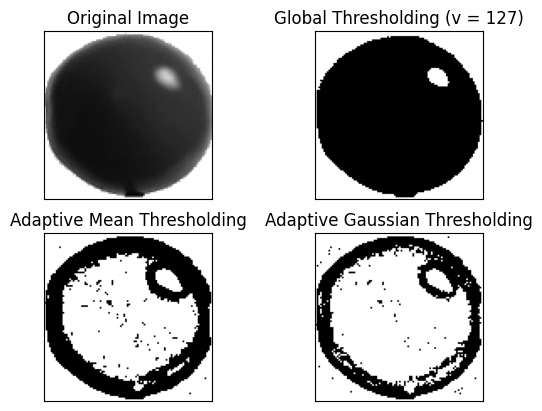

In [13]:
path = os.listdir(os.path.join(DATADIR, CATEGORIES[0]))
print(path)
img_eg = cv.imread(os.path.join(DATADIR, CATEGORIES[0], path[0]))
assert img_eg is not None, "file could not be read, check with os.path.exists()"
img_eg = cv.cvtColor(img_eg, cv.COLOR_BGR2GRAY)
img = cv.resize(img_eg, (IMG_SIZE, IMG_SIZE))
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

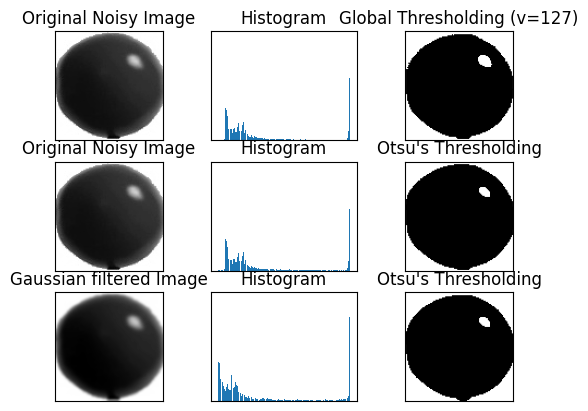

In [14]:
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv.imread(os.path.join(path, img))
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
            new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass

random.shuffle(training_data)

X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

['Tomato 4', 'Apple Red Delicious', 'Tomato 3', 'Huckleberry', 'Blueberry', 'Pear Red', 'Banana Lady Finger', 'Melon Piel de Sapo', 'Pear', 'Cherry 1', 'Strawberry', 'Nut Forest', 'Avocado', 'Tomato 2', 'Pomegranate', 'Dates', 'Carambula', 'Potato Red Washed', 'Granadilla', 'Kohlrabi', 'Tamarillo', 'Pepper Red', 'Fig', 'Ginger Root', 'Kiwi', 'Cherry Wax Yellow', 'Lemon', 'Guava', 'Apple Golden 2', 'Pear Stone', 'Apple Red 1', 'Cauliflower', 'Mandarine', 'Quince', 'Strawberry Wedge', 'Pear Monster', 'Raspberry', 'Pitahaya Red', 'Nut Pecan', 'Apple Golden 3', 'Redcurrant', 'Apple Red Yellow 1', 'Pepper Yellow', 'Grape Pink', 'Banana Red', 'Cucumber Ripe 2', 'Physalis', 'Cherry Rainier', 'Maracuja', 'Chestnut', 'Plum', 'Potato Sweet', 'Cucumber Ripe', 'Hazelnut', 'Nectarine', 'Cherry Wax Black', 'Cantaloupe 2', 'Lychee', 'Pepper Orange', 'Clementine', 'Watermelon', 'Pear Kaiser', 'Mangostan', 'Cherry 2', 'Pineapple Mini', 'Rambutan', 'Grape White', 'Tomato Yellow', 'Apple Braeburn', 'Toma

In [ ]:
test_data = []
DATADIR = "Fruit/fruits-360_dataset/fruits-360/Test"

In [5]:

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv.imread(os.path.join(path, img))
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
            new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_array, class_num])
        except Exception as e:
            pass

random.shuffle(test_data)

X_test = []
y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

In [5]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(131))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Epoch 1/10


2023-06-12 23:54:14.938569: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1904/1904 [==============================] - 41s 20ms/step - loss: 1.0504 - accuracy: 0.8361 - val_loss: 0.1096 - val_accuracy: 0.9691
Epoch 2/10
1904/1904 [==============================] - 35s 19ms/step - loss: 0.1389 - accuracy: 0.9661 - val_loss: 0.0797 - val_accuracy: 0.9790
Epoch 3/10
1904/1904 [==============================] - 35s 18ms/step - loss: 0.0938 - accuracy: 0.9782 - val_loss: 0.1814 - val_accuracy: 0.9750
Epoch 4/10
1904/1904 [==============================] - 35s 19ms/step - loss: 0.0914 - accuracy: 0.9807 - val_loss: 0.0561 - val_accuracy: 0.9892
Epoch 5/10
1904/1904 [==============================] - 36s 19ms/step - loss: 0.0982 - accuracy: 0.9818 - val_loss: 0.0607 - val_accuracy: 0.9882
Epoch 6/10
1904/1904 [==============================] - 35s 18ms/step - loss: 0.0794 - accuracy: 0.9863 - val_loss: 0.2169 - val_accuracy: 0.9744
Epoch 7/10
1904/1904 [==============================] - 35s 18ms/step - loss: 0.0907 - accuracy: 0.9856 - val_loss: 0.0665 - val_accura

In [7]:
img = model.predict(X_test, batch_size=32)

709/709 [==============================] - 4s 6ms/step


array([[2.6514858e-23, 1.4230681e-27, 1.2529897e-30, ..., 1.6891205e-30,
        2.9298481e-16, 5.2274852e-23],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [9]:
model.save("fruit_model.model")

INFO:tensorflow:Assets written to: fruit_model.model/assets


INFO:tensorflow:Assets written to: fruit_model.model/assets


In [6]:
# open fruit_model.model
model = tf.keras.models.load_model("fruit_model.model")

# test the model
prediction = model.predict([X_test])
print(CATEGORIES[np.argmax(prediction[0])])

2023-06-13 10:24:18.119802: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


709/709 [==============================] - 6s 8ms/step
Cherry Wax Black


1/1 [==============================] - 0s 89ms/step
Guava


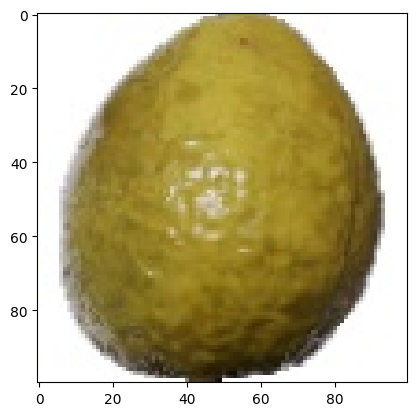

In [7]:
# test the model with a single image
img = cv.imread("Fruit/fruits-360_dataset/fruits-360/Test/Guava/34_100.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (IMG_SIZE, IMG_SIZE))
img = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction = model.predict([img])
print(CATEGORIES[np.argmax(prediction[0])])
plt.imshow(img[0])
plt.show()